In [ ]:
import torch
torch.cuda.empty_cache()

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 44.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 42.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 kB 11.7 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import json
import csv
import numpy as np

import os
import time

In [ ]:

import torch
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from transformers import BertTokenizer, BertForSequenceClassification
from sklearn.model_selection import train_test_split


from tabulate import tabulate
from tqdm import trange
import random

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Setting the base path
# base_path =  "drive/MyDrive/Classification"

In [ ]:
# os.chdir(base_path)

In [ ]:
import pandas as pd
# df = pd.read_csv('Training_Testing_Data/s1_original_dataset.csv')
# df = pd.read_csv('Training_Testing_Data/s1_training_dataset_chatgpt1.csv')
# df = pd.read_csv('Training_Testing_Data/s1_training_dataset_chatgpt2.csv')
# df = pd.read_csv('Training_Testing_Data/s1_training_dataset_gpt3_1.csv')
df = pd.read_csv('Training_Testing_Data/s1_training_dataset_gpt3_2.csv')
# df = pd.read_csv('Training_Testing_Data/s1_training_dataset_bt.csv')
# df = pd.read_csv('Training_Testing_Data/s1_training_dataset_eda.csv')
df.Aspect = df.Aspect.replace({1:0, 2:1, 3:2, 4:3})

In [ ]:
df_test = pd.read_csv('Training_Testing_Data/Aspect_testingset.csv')
df_test.Aspect = df_test.Aspect.replace({1:0, 2:1, 3:2, 4:3})

In [ ]:
df

,Text,Aspect,Explanations
0,I don't feel anything anymore and randomly bre...,0,randomly break down and cry
1,Somebody I care very much for has been on esci...,0,on escitalopram for years
2,"Now, for the past week and a half, he's been f...",0,crying
3,"I've been depressed for more than a year now, ...",0,self-diagnosed
4,"She's happier after she broke up with me, I fe...",0,"bipolar disorder, OCD and anxiety"
...,...,...,...
4371,I often feel like I'm being overlooked and tha...,3,"overlooked, no one notices presence."
4372,The negative thoughts keep coming in like a wa...,3,inadequate
4373,You start to question your purpose in life and...,3,question purpose in life
4374,You feel like you're a burden and that it woul...,3,feel like a burden


In [ ]:
df_test

,Unnamed: 0,Text,Aspect,Explanations
0,369,"Been coming off venlafaxine , it's been 2 week...",2,"down mood, headaches, sex problem, venlafaxine"
1,531,"My parents fight all the time, Idk if ive been...",2,"verbally abused, mother yells"
2,1379,Whenever I try talking about my problems no on...,2,no one seems to care
3,1380,"I‚Äö√Ñ√¥m trans, gay, a person of color, menta...",2,gay
4,1381,"No love, just bias",2,no love
...,...,...,...,...
175,3029,I feel like a piece of shit,3,piece of shit
176,3030,This echoing nothing that carries on from day ...,3,worthlessness
177,3031,And yet these thoughts they still exist and se...,3,scare
178,3032,So I tell myself that I'm fed up with life,3,fed up


In [ ]:
train_text = df.Text.values
train_labels = df.Aspect.values

test_text = df_test.Text.values
test_labels = df_test.Aspect.values


In [ ]:
tokenizer = BertTokenizer.from_pretrained(
    'bert-base-uncased',
    do_lower_case = True
    )

# from transformers import AutoTokenizer, AutoModelForSequenceClassification
# tokenizer = AutoTokenizer.from_pretrained(
#     "allenai/scibert_scivocab_uncased",
#     do_lower_case = True)

# from transformers import AutoTokenizer, RobertaForSequenceClassification
# tokenizer = AutoTokenizer.from_pretrained("cardiffnlp/twitter-roberta-base-emotion")

# from transformers import AutoTokenizer, GPT2ForSequenceClassification
# tokenizer = AutoTokenizer.from_pretrained("microsoft/DialogRPT-updown", do_lower_case = True)

# from transformers import AutoTokenizer, OpenAIGPTForSequenceClassification
# tokenizer = AutoTokenizer.from_pretrained("openai-gpt")

# from transformers import AutoTokenizer, DebertaForSequenceClassification
# tokenizer = AutoTokenizer.from_pretrained("microsoft/deberta-base")


In [ ]:
def print_rand_sentence(text):
  '''Displays the tokens and respective IDs of a random text sample'''
  index = random.randint(0, len(text)-1)
  table = np.array([tokenizer.tokenize(text[index]), 
                    tokenizer.convert_tokens_to_ids(tokenizer.tokenize(text[index]))]).T
  print(tabulate(table,
                 headers = ['Tokens', 'Token IDs'],
                 tablefmt = 'fancy_grid'))


print_rand_sentence(train_text)
print_rand_sentence(test_text)

╒════════════╤═════════════╕
│ Tokens     │   Token IDs │
╞════════════╪═════════════╡
│ i          │        1045 │
├────────────┼─────────────┤
│ feel       │        2514 │
├────────────┼─────────────┤
│ like       │        2066 │
├────────────┼─────────────┤
│ i          │        1045 │
├────────────┼─────────────┤
│ '          │        1005 │
├────────────┼─────────────┤
│ m          │        1049 │
├────────────┼─────────────┤
│ stuck      │        5881 │
├────────────┼─────────────┤
│ in         │        1999 │
├────────────┼─────────────┤
│ a          │        1037 │
├────────────┼─────────────┤
│ ru         │       21766 │
├────────────┼─────────────┤
│ ##t        │        2102 │
├────────────┼─────────────┤
│ and        │        1998 │
├────────────┼─────────────┤
│ have       │        2031 │
├────────────┼─────────────┤
│ no         │        2053 │
├────────────┼─────────────┤
│ motivation │       14354 │
├────────────┼─────────────┤
│ to         │        2000 │
├────────────┼

In [ ]:
token_id_train = []
attention_masks_train = []
token_id_test = []
attention_masks_test = []

def preprocessing(input_text, tokenizer):
  '''
  Returns <class transformers.tokenization_utils_base.BatchEncoding> with the following fields:
    - input_ids: list of token ids
    - token_type_ids: list of token type ids
    - attention_mask: list of indices (0,1) specifying which tokens should considered by the model (return_attention_mask = True).
  '''
  return tokenizer.encode_plus(
                        input_text,
                        add_special_tokens = True,
                        max_length = 256,
                        pad_to_max_length = True,
                        # truncation = True,
                        return_attention_mask = True,
                        return_tensors = 'pt'
                   )

# For training dataset
for sample in train_text:
  encoding_dict_train = preprocessing(sample, tokenizer)
  token_id_train.append(encoding_dict_train['input_ids']) 
  attention_masks_train.append(encoding_dict_train['attention_mask'])


token_id_train = torch.cat(token_id_train, dim = 0)
attention_masks_train = torch.cat(attention_masks_train, dim = 0)
labels_train = torch.tensor(train_labels)

print(token_id_train)
print(attention_masks_train)
print(labels_train)


# ------------------------------------------------------------------

# For testing dataset
for sample in test_text:
  encoding_dict = preprocessing(sample, tokenizer)
  token_id_test.append(encoding_dict['input_ids']) 
  attention_masks_test.append(encoding_dict['attention_mask'])


token_id_test = torch.cat(token_id_test, dim = 0)
attention_masks_test = torch.cat(attention_masks_test, dim = 0)
labels_test = torch.tensor(test_labels)

print(token_id_test)
print(attention_masks_test)
print(labels_test)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.9/dist-packages/transformers/tokenization_utils_base.py:2354: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


tensor([[  101,  1045,  2123,  ...,     0,     0,     0],
        [  101,  8307,  1045,  ...,     0,     0,     0],
        [  101,  2085,  1010,  ...,     0,     0,     0],
        ...,
        [  101,  2017,  2707,  ...,     0,     0,     0],
        [  101,  2017,  2514,  ...,     0,     0,     0],
        [  101,  1996, 13521,  ...,     0,     0,     0]])
tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]])
tensor([0, 0, 0,  ..., 3, 3, 3])
tensor([[ 101, 2042, 2746,  ...,    0,    0,    0],
        [ 101, 2026, 3008,  ...,    0,    0,    0],
        [ 101, 7188, 1045,  ...,    0,    0,    0],
        ...,
        [ 101, 1998, 2664,  ...,    0,    0,    0],
        [ 101, 2061, 1045,  ...,    0,    0,    0],
        [ 101, 2053, 3255,  ...,    0,    0,    0]])
tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 

In [ ]:
def print_rand_sentence_encoding(text, token_id, attention_mask):
  '''Displays tokens, token IDs and attention mask of a random text sample'''
  index = random.randint(0, len(text) - 1)
  tokens = tokenizer.tokenize(tokenizer.decode(token_id[index]))
  token_ids = [i.numpy() for i in token_id[index]]
  attention = [i.numpy() for i in attention_mask[index]]

  table = np.array([tokens, token_ids, attention]).T
  print(tabulate(table, 
                 headers = ['Tokens', 'Token IDs', 'Attention Mask'],
                 tablefmt = 'fancy_grid'))

print_rand_sentence_encoding(train_text, token_id_train, attention_masks_train)
print_rand_sentence_encoding(test_text, token_id_test, attention_masks_test)

╒═════════════╤═════════════╤══════════════════╕
│ Tokens      │   Token IDs │   Attention Mask │
╞═════════════╪═════════════╪══════════════════╡
│ [CLS]       │         101 │                1 │
├─────────────┼─────────────┼──────────────────┤
│ need        │        2342 │                1 │
├─────────────┼─────────────┼──────────────────┤
│ ideas       │        4784 │                1 │
├─────────────┼─────────────┼──────────────────┤
│ ,           │        1010 │                1 │
├─────────────┼─────────────┼──────────────────┤
│ inspiration │        7780 │                1 │
├─────────────┼─────────────┼──────────────────┤
│ ,           │        1010 │                1 │
├─────────────┼─────────────┼──────────────────┤
│ advice      │        6040 │                1 │
├─────────────┼─────────────┼──────────────────┤
│ ,           │        1010 │                1 │
├─────────────┼─────────────┼──────────────────┤
│ anything    │        2505 │                1 │
├─────────────┼─────

In [ ]:
val_ratio = 0.2
# Recommended batch size: 16, 32. See: https://arxiv.org/pdf/1810.04805.pdf
batch_size = 32

# Indices of the train and validation splits stratified by labels
train_idx, val_idx = train_test_split(
    np.arange(len(train_labels)),
    test_size = val_ratio,
    shuffle = True,
    stratify = train_labels)

train_idx = np.arange(len(train_labels))
test_idx = np.arange(len(test_labels))

# Train and validation sets
train_set = TensorDataset(token_id_train[train_idx], 
                          attention_masks_train[train_idx], 
                          labels_train[train_idx])

val_set = TensorDataset(token_id_train[val_idx], 
                        attention_masks_train[val_idx], 
                        labels_train[val_idx])

test_set = TensorDataset(token_id_test[test_idx], 
                        attention_masks_test[test_idx], 
                        labels_test[test_idx])

# Prepare DataLoader
train_dataloader = DataLoader(
            train_set,
            sampler = RandomSampler(train_set),
            batch_size = batch_size
        )

validation_dataloader = DataLoader(
            val_set,
            sampler = SequentialSampler(val_set),
            batch_size = batch_size
        )

In [ ]:
labels_train[val_idx]

tensor([2, 0, 1, 0, 1, 0, 3, 0, 3, 3, 3, 2, 1, 1, 0, 1, 3, 1, 2, 3, 0, 3, 1, 1,
        3, 2, 2, 1, 0, 1, 0, 3, 1, 1, 2, 1, 2, 3, 0, 1, 1, 3, 2, 2, 3, 2, 0, 3,
        0, 0, 2, 1, 0, 2, 0, 3, 2, 3, 3, 2, 1, 1, 1, 1, 3, 3, 0, 3, 0, 3, 1, 3,
        0, 0, 0, 0, 2, 1, 1, 0, 1, 3, 1, 0, 1, 3, 1, 1, 0, 0, 3, 0, 0, 2, 3, 0,
        2, 1, 1, 3, 3, 2, 0, 3, 0, 3, 0, 0, 1, 2, 3, 2, 0, 3, 1, 0, 2, 3, 0, 1,
        1, 0, 0, 3, 0, 0, 2, 1, 2, 2, 2, 1, 2, 1, 1, 2, 1, 3, 0, 3, 0, 3, 1, 2,
        2, 2, 2, 3, 0, 1, 1, 0, 3, 0, 2, 3, 1, 2, 1, 1, 0, 3, 1, 0, 0, 0, 3, 0,
        1, 1, 2, 2, 3, 3, 3, 2, 1, 3, 2, 3, 0, 1, 0, 2, 3, 1, 1, 0, 3, 0, 1, 0,
        3, 2, 0, 1, 3, 2, 1, 3, 0, 2, 1, 1, 3, 1, 2, 3, 3, 1, 3, 2, 2, 2, 1, 1,
        1, 2, 1, 2, 0, 0, 2, 2, 3, 3, 2, 2, 0, 1, 1, 2, 1, 3, 2, 1, 3, 3, 0, 1,
        0, 2, 2, 1, 3, 3, 2, 0, 0, 1, 0, 0, 2, 0, 2, 1, 3, 3, 3, 2, 1, 2, 1, 2,
        3, 0, 1, 0, 2, 1, 2, 2, 1, 0, 2, 2, 3, 2, 2, 3, 2, 3, 1, 3, 1, 2, 0, 2,
        1, 0, 0, 2, 2, 1, 1, 3, 1, 0, 3,

In [ ]:
def b_tp(preds, labels):
  '''Returns True Positives (TP): count of correct predictions of actual class 1'''
  return sum([preds == labels and preds == 1 for preds, labels in zip(preds, labels)])

def b_fp(preds, labels):
  '''Returns False Positives (FP): count of wrong predictions of actual class 1'''
  return sum([preds != labels and preds == 1 for preds, labels in zip(preds, labels)])

def b_tn(preds, labels):
  '''Returns True Negatives (TN): count of correct predictions of actual class 0'''
  return sum([preds == labels and preds == 0 for preds, labels in zip(preds, labels)])

def b_fn(preds, labels):
  '''Returns False Negatives (FN): count of wrong predictions of actual class 0'''
  return sum([preds != labels and preds == 0 for preds, labels in zip(preds, labels)])

def b_metrics(preds, labels):
  '''
  Returns the following metrics:
    - accuracy    = (TP + TN) / N
    - precision   = TP / (TP + FP)
    - recall      = TP / (TP + FN)
    - specificity = TN / (TN + FP)
  '''
  preds = np.argmax(preds, axis = 1).flatten()
  labels = labels.flatten()
  tp = b_tp(preds, labels)
  tn = b_tn(preds, labels)
  fp = b_fp(preds, labels)
  fn = b_fn(preds, labels)
  b_accuracy = (tp + tn) / len(labels)
  b_precision = tp / (tp + fp) if (tp + fp) > 0 else 'nan'
  b_recall = tp / (tp + fn) if (tp + fn) > 0 else 'nan'
  b_specificity = tn / (tn + fp) if (tn + fp) > 0 else 'nan'
  return b_accuracy, b_precision, b_recall, b_specificity


In [ ]:
model = BertForSequenceClassification.from_pretrained(
    'bert-base-uncased',
    num_labels = 4,
    output_attentions = False,
    output_hidden_states = False,
)


# model = AutoModelForSequenceClassification.from_pretrained(
#     "allenai/scibert_scivocab_uncased", 
#     num_labels=4)

# model = RobertaForSequenceClassification.from_pretrained(
#     "cardiffnlp/twitter-roberta-base-emotion",
#     num_labels=4)

# model = DebertaForSequenceClassification.from_pretrained("microsoft/deberta-base")

# model = GPT2ForSequenceClassification.from_pretrained("microsoft/DialogRPT-updown", num_labels=4, output_attentions = False, output_hidden_states = False, ignore_mismatched_sizes=True)

# model = TFAlbertForSequenceClassification.from_pretrained("vumichien/albert-base-v2-imdb", num_labels=4, output_attentions = False, output_hidden_states = False)


# Recommended learning rates (Adam): 5e-5, 3e-5, 2e-5. See: https://arxiv.org/pdf/1810.04805.pdf
optimizer = torch.optim.AdamW(model.parameters(), 
                              lr = 3e-5,
                              # lr = 2e-5,
                              eps = 1e-08
                              )
# model = TFAlbertForSequenceClassification.from_pretrained(MODEL_NAME, num_labels=5)

# # Run on GPU
# model.cuda()
model.cuda()

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12,

In [ ]:
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
import torch
from sklearn.metrics import matthews_corrcoef, confusion_matrix
# If there's a GPU available...
if torch.cuda.is_available():    

    # Tell PyTorch to use the GPU.    
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")
# Recommended number of epochs: 2, 3, 4. See: https://arxiv.org/pdf/1810.04805.pdf
epochs = 10

model = model.to("cuda")
for _ in trange(epochs, desc = 'Epoch'):
    
    # ========== Training ==========
    
    # Set model to training mode
    model.train()
    
    # Tracking variables
    tr_loss = 0
    nb_tr_examples, nb_tr_steps = 0, 0

    for step, batch in enumerate(train_dataloader):
        batch = tuple(t.to(device) for t in batch)
        b_input_ids, b_input_mask, b_labels = batch
        print(b_labels)
        # b_labels = b_labels.astype(float)
        optimizer.zero_grad()
        # Forward pass
        train_output = model(b_input_ids, 
                             token_type_ids = None, 
                             attention_mask = b_input_mask, 
                             labels = b_labels)
        # Backward pass
        train_output.loss.backward()
        optimizer.step()
        # Update tracking variables
        tr_loss += train_output.loss.item()
        nb_tr_examples += b_input_ids.size(0)
        nb_tr_steps += 1

    

There are 1 GPU(s) available.
We will use the GPU: Tesla T4


Epoch:   0%|          | 0/10 [00:00<?, ?it/s]

tensor([3, 1, 3, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 3, 0, 0, 0, 0, 0, 3, 3, 1, 1, 1,
        2, 1, 3, 1, 2, 1, 2, 1], device='cuda:0')
tensor([3, 0, 0, 2, 2, 3, 0, 1, 2, 3, 1, 0, 0, 3, 3, 0, 1, 3, 2, 2, 3, 3, 2, 0,
        3, 2, 1, 3, 1, 2, 3, 2], device='cuda:0')
tensor([1, 2, 0, 0, 0, 3, 3, 1, 1, 2, 2, 2, 1, 1, 3, 0, 3, 0, 2, 2, 3, 0, 3, 1,
        1, 3, 0, 3, 0, 2, 3, 2], device='cuda:0')
tensor([3, 3, 1, 3, 0, 0, 0, 0, 2, 0, 3, 1, 0, 1, 0, 1, 2, 3, 2, 0, 0, 1, 2, 0,
        2, 3, 2, 3, 3, 3, 3, 2], device='cuda:0')
tensor([2, 1, 2, 0, 0, 0, 1, 0, 3, 3, 1, 1, 3, 0, 1, 2, 3, 0, 2, 2, 3, 3, 2, 1,
        3, 1, 0, 2, 3, 1, 2, 3], device='cuda:0')
tensor([0, 1, 3, 0, 1, 3, 1, 1, 3, 0, 2, 1, 2, 1, 1, 2, 3, 0, 3, 2, 3, 0, 2, 0,
        3, 2, 2, 1, 1, 3, 2, 0], device='cuda:0')
tensor([1, 3, 1, 1, 2, 1, 3, 1, 2, 1, 0, 2, 0, 2, 2, 1, 2, 0, 0, 1, 3, 2, 0, 1,
        2, 2, 0, 2, 0, 0, 3, 0], device='cuda:0')
tensor([0, 3, 0, 3, 0, 2, 1, 0, 2, 1, 1, 1, 0, 2, 1, 2, 3, 1, 3, 1, 1, 3, 1, 3,
        2,

Epoch:  10%|█         | 1/10 [03:00<27:06, 180.74s/it]

tensor([3, 3, 0, 3, 3, 3, 0, 0, 1, 2, 3, 0, 3, 0, 0, 0, 1, 0, 1, 3, 1, 1, 1, 1,
        0, 3, 3, 3, 3, 0, 2, 2], device='cuda:0')
tensor([0, 1, 3, 0, 0, 3, 1, 3, 0, 0, 3, 3, 2, 1, 3, 1, 2, 2, 3, 3, 3, 1, 1, 2,
        0, 3, 3, 1, 2, 3, 0, 3], device='cuda:0')
tensor([1, 2, 3, 2, 0, 1, 1, 1, 0, 1, 3, 3, 2, 1, 2, 3, 2, 1, 1, 3, 2, 2, 1, 3,
        3, 2, 3, 3, 0, 2, 0, 3], device='cuda:0')
tensor([3, 3, 2, 0, 2, 3, 3, 2, 0, 2, 2, 1, 3, 0, 3, 2, 2, 0, 1, 0, 1, 2, 2, 0,
        3, 2, 3, 3, 2, 2, 1, 1], device='cuda:0')
tensor([1, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 3, 3, 0, 2, 0, 0, 0, 0, 2, 2, 0, 2,
        2, 2, 2, 1, 0, 1, 1, 0], device='cuda:0')
tensor([3, 0, 3, 3, 3, 1, 1, 2, 1, 0, 1, 3, 2, 1, 3, 3, 0, 2, 0, 1, 0, 3, 1, 3,
        0, 3, 2, 1, 1, 2, 3, 2], device='cuda:0')
tensor([2, 3, 3, 3, 1, 3, 2, 1, 1, 1, 1, 3, 1, 3, 1, 1, 3, 3, 2, 0, 2, 3, 3, 1,
        0, 3, 1, 1, 3, 3, 0, 1], device='cuda:0')
tensor([1, 0, 1, 2, 0, 2, 0, 1, 2, 3, 3, 3, 3, 2, 3, 2, 0, 3, 0, 3, 3, 2, 3, 1,
        3,

Epoch:  20%|██        | 2/10 [06:07<24:32, 184.10s/it]

tensor([2, 3, 0, 0, 3, 0, 3, 2, 2, 0, 3, 0, 0, 2, 0, 1, 0, 3, 3, 2, 1, 2, 3, 1,
        2, 1, 0, 3, 1, 0, 1, 0], device='cuda:0')
tensor([0, 1, 0, 0, 1, 1, 3, 0, 2, 0, 0, 2, 1, 0, 2, 2, 2, 2, 1, 0, 0, 0, 0, 0,
        0, 3, 0, 3, 1, 1, 0, 3], device='cuda:0')
tensor([0, 2, 0, 1, 1, 2, 0, 0, 2, 0, 3, 0, 3, 0, 3, 1, 0, 2, 2, 2, 3, 2, 0, 3,
        0, 2, 1, 1, 1, 3, 1, 3], device='cuda:0')
tensor([1, 2, 2, 1, 1, 0, 2, 0, 0, 0, 0, 3, 2, 2, 0, 0, 0, 1, 3, 0, 3, 3, 1, 2,
        1, 0, 0, 3, 0, 0, 2, 2], device='cuda:0')
tensor([3, 1, 3, 1, 2, 1, 2, 3, 1, 2, 2, 0, 0, 3, 2, 2, 1, 1, 0, 2, 2, 2, 2, 0,
        2, 0, 1, 1, 2, 0, 1, 2], device='cuda:0')
tensor([0, 2, 3, 0, 0, 2, 2, 1, 1, 3, 0, 3, 1, 0, 1, 2, 0, 2, 3, 3, 0, 3, 3, 2,
        1, 2, 2, 2, 0, 0, 3, 0], device='cuda:0')
tensor([3, 3, 2, 0, 2, 3, 3, 1, 3, 0, 0, 2, 2, 3, 2, 3, 0, 3, 3, 0, 2, 3, 3, 1,
        2, 3, 0, 0, 1, 2, 2, 3], device='cuda:0')
tensor([2, 1, 3, 1, 2, 1, 1, 2, 2, 0, 1, 0, 0, 1, 0, 3, 2, 0, 3, 1, 2, 3, 3, 1,
        0,

Epoch:  30%|███       | 3/10 [09:13<21:35, 185.07s/it]

tensor([3, 3, 3, 2, 0, 0, 1, 3, 1, 2, 3, 1, 0, 3, 3, 2, 1, 3, 3, 0, 2, 2, 1, 0,
        1, 3, 2, 1, 0, 2, 3, 2], device='cuda:0')
tensor([1, 1, 3, 0, 1, 2, 2, 3, 1, 2, 1, 3, 2, 0, 1, 1, 2, 0, 1, 0, 3, 2, 2, 3,
        3, 0, 2, 3, 3, 2, 0, 3], device='cuda:0')
tensor([3, 2, 2, 2, 2, 2, 0, 0, 3, 0, 3, 1, 1, 2, 3, 0, 1, 0, 0, 3, 0, 1, 1, 0,
        0, 0, 1, 0, 0, 1, 0, 1], device='cuda:0')
tensor([1, 2, 2, 2, 1, 1, 1, 0, 0, 0, 2, 3, 2, 1, 2, 2, 3, 2, 0, 1, 3, 3, 2, 0,
        0, 1, 1, 2, 1, 0, 3, 2], device='cuda:0')
tensor([3, 3, 3, 0, 0, 0, 0, 3, 3, 1, 0, 2, 1, 0, 0, 0, 0, 1, 2, 2, 0, 3, 3, 0,
        0, 3, 0, 3, 0, 2, 3, 1], device='cuda:0')
tensor([1, 0, 2, 3, 3, 3, 1, 2, 3, 3, 0, 3, 0, 0, 0, 3, 1, 2, 2, 2, 3, 0, 1, 2,
        0, 0, 2, 3, 3, 0, 1, 1], device='cuda:0')
tensor([2, 0, 0, 3, 0, 2, 3, 1, 3, 1, 3, 2, 0, 3, 0, 0, 1, 1, 2, 0, 1, 1, 1, 1,
        2, 1, 3, 1, 3, 3, 2, 1], device='cuda:0')
tensor([3, 3, 0, 0, 2, 1, 0, 2, 3, 1, 0, 2, 0, 2, 1, 3, 2, 0, 3, 2, 0, 3, 0, 2,
        3,

Epoch:  40%|████      | 4/10 [12:19<18:33, 185.64s/it]

tensor([1, 2, 3, 0, 0, 3, 2, 2, 3, 0, 1, 1, 1, 3, 2, 2, 1, 1, 0, 2, 1, 3, 1, 1,
        1, 2, 0, 2, 0, 2, 1, 1], device='cuda:0')
tensor([1, 1, 1, 3, 3, 3, 0, 3, 2, 3, 0, 0, 2, 3, 0, 2, 2, 3, 0, 0, 0, 2, 3, 2,
        1, 2, 1, 3, 0, 0, 1, 2], device='cuda:0')
tensor([2, 3, 2, 2, 0, 2, 1, 1, 3, 2, 3, 2, 1, 1, 3, 1, 2, 0, 3, 0, 1, 1, 2, 3,
        3, 3, 3, 2, 3, 1, 0, 1], device='cuda:0')
tensor([2, 1, 0, 1, 2, 1, 2, 0, 2, 2, 3, 0, 1, 3, 1, 2, 3, 0, 2, 0, 2, 2, 0, 1,
        0, 1, 2, 2, 2, 3, 0, 3], device='cuda:0')
tensor([0, 2, 2, 2, 3, 0, 2, 3, 2, 3, 1, 0, 0, 3, 3, 2, 3, 3, 0, 3, 1, 1, 3, 3,
        3, 2, 1, 2, 2, 1, 3, 3], device='cuda:0')
tensor([0, 3, 0, 2, 0, 2, 1, 0, 1, 3, 3, 2, 3, 1, 0, 2, 1, 2, 2, 1, 3, 0, 0, 3,
        3, 1, 0, 3, 1, 2, 3, 2], device='cuda:0')
tensor([1, 3, 2, 2, 2, 0, 1, 0, 2, 3, 0, 2, 3, 3, 1, 1, 0, 3, 2, 0, 1, 0, 1, 2,
        2, 2, 3, 0, 1, 2, 2, 3], device='cuda:0')
tensor([2, 0, 2, 0, 1, 0, 2, 2, 3, 2, 2, 2, 1, 0, 2, 3, 0, 2, 2, 1, 2, 0, 3, 0,
        2,

Epoch:  50%|█████     | 5/10 [15:26<15:30, 186.01s/it]

tensor([1, 2, 3, 3, 0, 1, 2, 3, 3, 3, 2, 2, 3, 1, 0, 1, 2, 0, 3, 3, 3, 0, 0, 1,
        3, 1, 3, 3, 0, 0, 2, 3], device='cuda:0')
tensor([0, 1, 1, 0, 0, 3, 2, 1, 1, 2, 1, 3, 1, 3, 3, 0, 3, 3, 0, 0, 0, 2, 1, 0,
        2, 3, 1, 3, 2, 1, 3, 3], device='cuda:0')
tensor([0, 0, 1, 3, 2, 3, 1, 0, 0, 2, 2, 0, 0, 1, 1, 0, 1, 2, 3, 1, 3, 0, 2, 0,
        3, 0, 3, 3, 1, 1, 2, 1], device='cuda:0')
tensor([0, 3, 2, 3, 0, 2, 0, 0, 1, 3, 2, 1, 1, 0, 0, 1, 3, 3, 3, 3, 3, 0, 2, 0,
        0, 3, 1, 3, 2, 3, 3, 1], device='cuda:0')
tensor([0, 2, 0, 2, 0, 3, 2, 3, 0, 1, 0, 1, 2, 0, 3, 0, 1, 2, 0, 1, 0, 3, 3, 1,
        3, 1, 0, 2, 0, 3, 3, 3], device='cuda:0')
tensor([0, 3, 1, 1, 0, 0, 3, 1, 3, 0, 3, 2, 3, 3, 1, 2, 0, 1, 2, 3, 0, 1, 3, 3,
        2, 2, 0, 1, 3, 2, 3, 2], device='cuda:0')
tensor([0, 1, 1, 1, 3, 2, 3, 1, 0, 0, 0, 1, 2, 3, 0, 1, 2, 2, 1, 0, 1, 1, 3, 0,
        1, 1, 2, 3, 1, 0, 1, 1], device='cuda:0')
tensor([3, 0, 0, 0, 2, 1, 0, 1, 1, 1, 2, 3, 0, 3, 2, 2, 2, 2, 1, 3, 2, 3, 0, 1,
        0,

Epoch:  60%|██████    | 6/10 [18:32<12:24, 186.08s/it]

tensor([1, 2, 2, 2, 0, 1, 1, 2, 2, 0, 2, 2, 1, 0, 3, 3, 2, 3, 3, 3, 1, 0, 0, 0,
        0, 0, 2, 3, 1, 1, 3, 3], device='cuda:0')
tensor([3, 0, 1, 0, 3, 2, 3, 3, 1, 0, 0, 2, 2, 3, 2, 3, 0, 3, 0, 2, 0, 0, 0, 3,
        3, 0, 0, 2, 3, 2, 3, 1], device='cuda:0')
tensor([0, 0, 1, 3, 0, 1, 2, 0, 2, 0, 1, 0, 2, 2, 0, 3, 0, 3, 2, 1, 3, 1, 1, 0,
        1, 3, 2, 1, 2, 3, 0, 2], device='cuda:0')
tensor([2, 3, 3, 0, 1, 0, 2, 1, 1, 0, 0, 2, 1, 0, 0, 3, 2, 0, 0, 0, 2, 3, 1, 0,
        0, 3, 2, 3, 2, 0, 3, 3], device='cuda:0')
tensor([2, 1, 2, 1, 3, 1, 3, 0, 3, 2, 0, 0, 1, 2, 3, 3, 2, 1, 3, 1, 3, 3, 2, 2,
        0, 1, 2, 1, 0, 2, 3, 0], device='cuda:0')
tensor([0, 1, 3, 0, 3, 2, 0, 0, 0, 2, 0, 0, 3, 2, 0, 2, 3, 3, 2, 2, 2, 1, 3, 0,
        1, 2, 0, 1, 2, 1, 1, 2], device='cuda:0')
tensor([2, 0, 3, 1, 0, 3, 1, 1, 1, 1, 3, 2, 0, 0, 3, 3, 1, 0, 2, 1, 3, 3, 3, 3,
        1, 2, 0, 3, 2, 1, 2, 3], device='cuda:0')
tensor([1, 3, 1, 1, 1, 2, 1, 1, 3, 1, 0, 0, 0, 2, 0, 0, 1, 1, 1, 3, 0, 2, 1, 2,
        1,

Epoch:  70%|███████   | 7/10 [21:39<09:18, 186.17s/it]

tensor([0, 2, 0, 2, 3, 2, 0, 0, 1, 0, 3, 2, 1, 1, 2, 2, 2, 1, 1, 3, 2, 1, 2, 0,
        1, 1, 3, 3, 3, 0, 3, 2], device='cuda:0')
tensor([2, 1, 0, 1, 2, 1, 2, 3, 3, 1, 0, 1, 0, 3, 2, 3, 3, 0, 3, 2, 2, 2, 0, 2,
        0, 0, 1, 2, 3, 1, 2, 1], device='cuda:0')
tensor([1, 3, 3, 2, 2, 0, 0, 2, 2, 2, 2, 3, 0, 0, 0, 0, 2, 2, 3, 3, 1, 0, 0, 2,
        0, 0, 1, 2, 0, 2, 2, 3], device='cuda:0')
tensor([0, 3, 2, 1, 0, 2, 1, 1, 0, 0, 3, 0, 3, 3, 1, 1, 3, 0, 3, 2, 3, 3, 0, 2,
        3, 2, 3, 2, 3, 0, 1, 1], device='cuda:0')
tensor([2, 3, 0, 2, 2, 1, 1, 3, 3, 2, 2, 0, 3, 1, 0, 1, 2, 0, 1, 2, 1, 3, 3, 1,
        0, 0, 2, 3, 0, 3, 0, 3], device='cuda:0')
tensor([3, 1, 3, 2, 0, 0, 1, 1, 2, 2, 0, 0, 3, 1, 1, 3, 0, 0, 2, 1, 0, 1, 3, 1,
        3, 0, 2, 2, 0, 3, 3, 2], device='cuda:0')
tensor([2, 1, 1, 3, 0, 1, 0, 0, 1, 2, 2, 2, 3, 0, 3, 1, 3, 3, 1, 0, 3, 0, 1, 2,
        1, 3, 3, 1, 1, 2, 2, 0], device='cuda:0')
tensor([2, 3, 2, 2, 0, 0, 2, 2, 2, 0, 0, 1, 2, 2, 0, 2, 3, 3, 1, 0, 2, 2, 2, 3,
        1,

Epoch:  80%|████████  | 8/10 [24:45<06:12, 186.27s/it]

tensor([2, 1, 2, 0, 3, 3, 3, 3, 1, 1, 3, 2, 2, 3, 1, 2, 2, 2, 3, 2, 3, 3, 2, 2,
        3, 3, 1, 3, 0, 0, 2, 1], device='cuda:0')
tensor([1, 3, 3, 1, 3, 1, 1, 2, 0, 3, 1, 3, 0, 0, 0, 0, 3, 1, 0, 1, 3, 3, 0, 1,
        2, 0, 0, 2, 0, 1, 2, 3], device='cuda:0')
tensor([0, 3, 2, 3, 1, 2, 0, 1, 0, 0, 1, 2, 2, 2, 3, 0, 0, 2, 0, 2, 3, 3, 0, 2,
        3, 3, 2, 1, 3, 1, 3, 3], device='cuda:0')
tensor([3, 1, 1, 1, 1, 0, 1, 3, 1, 0, 1, 3, 0, 2, 2, 3, 0, 0, 1, 1, 0, 1, 0, 1,
        2, 3, 2, 1, 1, 3, 1, 2], device='cuda:0')
tensor([0, 1, 2, 2, 1, 2, 0, 2, 3, 2, 3, 1, 3, 2, 0, 2, 2, 2, 3, 1, 0, 0, 0, 1,
        0, 3, 2, 1, 3, 0, 1, 1], device='cuda:0')
tensor([3, 3, 1, 0, 0, 1, 1, 0, 3, 0, 2, 3, 1, 1, 2, 1, 1, 1, 3, 2, 3, 3, 1, 0,
        3, 0, 2, 0, 3, 2, 1, 0], device='cuda:0')
tensor([1, 1, 1, 0, 3, 1, 1, 1, 1, 2, 3, 3, 0, 0, 3, 0, 2, 0, 0, 0, 2, 1, 3, 2,
        3, 0, 1, 1, 3, 0, 2, 1], device='cuda:0')
tensor([0, 3, 3, 1, 0, 2, 0, 3, 3, 0, 3, 1, 1, 1, 1, 3, 2, 1, 2, 2, 2, 3, 1, 2,
        1,

Epoch:  90%|█████████ | 9/10 [27:52<03:06, 186.36s/it]

tensor([3, 1, 0, 1, 1, 3, 3, 0, 2, 0, 2, 2, 3, 0, 0, 3, 2, 1, 1, 1, 2, 0, 0, 3,
        0, 2, 2, 1, 0, 1, 3, 0], device='cuda:0')
tensor([0, 3, 3, 1, 3, 2, 0, 1, 1, 3, 3, 0, 3, 1, 2, 3, 2, 0, 1, 1, 1, 1, 2, 1,
        3, 3, 0, 3, 0, 1, 1, 3], device='cuda:0')
tensor([0, 0, 2, 0, 0, 0, 1, 2, 1, 0, 1, 0, 1, 2, 1, 3, 1, 2, 0, 0, 3, 3, 0, 2,
        3, 1, 0, 2, 1, 3, 1, 1], device='cuda:0')
tensor([1, 0, 2, 3, 0, 2, 2, 0, 2, 0, 1, 3, 1, 0, 1, 3, 2, 3, 0, 0, 1, 1, 1, 1,
        3, 1, 2, 1, 1, 3, 0, 0], device='cuda:0')
tensor([0, 1, 0, 3, 1, 0, 1, 0, 0, 1, 2, 0, 2, 2, 2, 0, 2, 1, 1, 2, 2, 2, 3, 3,
        2, 3, 0, 3, 0, 0, 3, 3], device='cuda:0')
tensor([1, 3, 3, 1, 1, 1, 2, 0, 3, 1, 1, 1, 2, 0, 3, 3, 2, 3, 2, 1, 3, 0, 3, 0,
        1, 3, 3, 2, 2, 2, 1, 3], device='cuda:0')
tensor([3, 2, 3, 0, 0, 2, 3, 0, 2, 2, 3, 3, 3, 0, 1, 0, 0, 3, 0, 3, 3, 0, 0, 3,
        0, 1, 1, 0, 1, 0, 3, 0], device='cuda:0')
tensor([2, 3, 1, 0, 0, 3, 3, 1, 3, 1, 0, 3, 1, 1, 2, 0, 3, 0, 1, 2, 1, 2, 0, 0,
        0,

Epoch: 100%|██████████| 10/10 [30:58<00:00, 185.89s/it]


In [ ]:
# ========== Validation ==========

# Set model to evaluation mode
model.eval()

# Tracking variables 
val_accuracy = []
val_precision = []
val_recall = []
val_specificity = []
val_fmeasure=[]
val_MCC=[]

for batch in validation_dataloader:
    batch = tuple(t.to(device) for t in batch)
    b_input_ids, b_input_mask, b_labels = batch
    with torch.no_grad():
      # Forward pass
      eval_output = model(b_input_ids, 
                          token_type_ids = None, 
                          attention_mask = b_input_mask)
    logits = eval_output.logits.detach().cpu().numpy()
    print(logits.shape)
    label_ids = b_labels.to('cpu').numpy()


    print(label_ids.shape)
    # Calculate validation metrics
    b_accuracy, b_precision, b_recall, b_specificity = b_metrics(logits, label_ids)
    val_accuracy.append(b_accuracy)
    # Update precision only when (tp + fp) !=0; ignore nan
    if b_precision != 'nan': val_precision.append(b_precision)
    # Update recall only when (tp + fn) !=0; ignore nan
    if b_recall != 'nan': val_recall.append(b_recall)
    # Update specificity only when (tn + fp) !=0; ignore nan
    if b_specificity != 'nan': val_specificity.append(b_specificity)

    b_fmeasure=(2 * b_precision * b_recall) / (b_precision + b_recall)
    if b_fmeasure != 'nan': val_fmeasure.append(b_fmeasure)

    y_pred_bool = np.argmax(logits, axis=1)
    print(y_pred_bool.shape)
    y_pred_bool = y_pred_bool.reshape(-1,1)
    print(y_pred_bool.shape)
    from sklearn.metrics import classification_report
    print(classification_report(label_ids, y_pred_bool))

    # confusion =confusion_matrix(label_ids, logits)
    # print(confusion)
    matthew=matthews_corrcoef(label_ids, y_pred_bool)
    print(matthew)
    val_MCC.append(matthew)
    # print('\n\t - Train loss: {:.4f}'.format(tr_loss / nb_tr_steps))
    print('\t - Validation Accuracy: {:.4f}'.format(b_accuracy))
    print('\t - Validation Precision: {:.4f}'.format(b_precision))
    print('\t - Validation Recall: {:.4f}'.format(b_recall))
    # print('\t - Validation Specificity: '.format(b_specificity))
    print('\t - Validation FMeasure: {:.4f}'.format(b_fmeasure))
    print('\t - Validation MCC: {:.4f}\n'.format(matthew))


In [ ]:
print('\n\t - Train loss: {:.4f}'.format(tr_loss / nb_tr_steps))
print('\t - Validation Accuracy: {:.4f}'.format(sum(val_accuracy)/len(val_accuracy)))
print('\t - Validation Precision: {:.4f}'.format(sum(val_precision)/len(val_precision)) if len(val_precision)>0 else '\t - Validation Precision: NaN')
print('\t - Validation Recall: {:.4f}'.format(sum(val_recall)/len(val_recall)) if len(val_recall)>0 else '\t - Validation Recall: NaN')
# print('\t - Validation Specificity: {:.4f}\n'.format(sum(val_specificity)/len(val_specificity)) if len(val_specificity)>0 else '\t - Validation Specificity: NaN')
print('\t - Validation F Measure: {:.4f}\n'.format(sum(val_fmeasure)/len(val_fmeasure)) if len(val_fmeasure)>0 else '\t - Validation Fmeasure: NaN')
print('\t - Validation MCC: {:.4f}\n'.format(sum(val_MCC)/len(val_MCC)) if len(val_MCC)>0 else '\t - Validation Fmeasure: NaN')


In [ ]:
test_dataloader = DataLoader(
            test_set,
            sampler = SequentialSampler(test_set),
            batch_size = 180
        )

In [ ]:
# ========== testing ==========

# Set model to evaluation mode
model.eval()

for batch in test_dataloader:
  batch = tuple(t.to(device) for t in batch)
  b_input_ids, b_input_mask, b_labels = batch
  with torch.no_grad():
    # Forward pass
    eval_output = model(b_input_ids, 
                        token_type_ids = None, 
                        attention_mask = b_input_mask)
  logits = eval_output.logits.detach().cpu().numpy()
  print("logits shape:{}".format(logits.shape))
  label_ids = b_labels.to('cpu').numpy()

  y_pred_bool = np.argmax(logits, axis=1)
  print(y_pred_bool.shape)
  y_pred_bool = y_pred_bool.reshape(-1,1)
  print(y_pred_bool.shape)

  from sklearn.metrics import classification_report
  print(classification_report(label_ids, y_pred_bool))

  matthew=matthews_corrcoef(label_ids, y_pred_bool)
  print("Matthew:{}".format(matthew))

    

logits shape:(180, 4)
(180,)
(180, 1)
              precision    recall  f1-score   support

           0       0.69      0.91      0.79        45
           1       0.61      0.49      0.54        45
           2       0.71      0.60      0.65        45
           3       0.64      0.67      0.65        45

    accuracy                           0.67       180
   macro avg       0.66      0.67      0.66       180
weighted avg       0.66      0.67      0.66       180

Matthew:0.5593667078870225


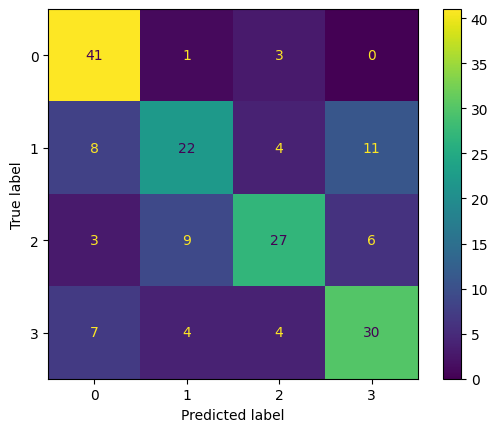

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import matplotlib.pyplot as plt

confusion_matrix = metrics.confusion_matrix(label_ids, y_pred_bool)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display.plot()
plt.savefig('gpt3_2.pdf', bbox_inches="tight", pad_inches=0.1)  
plt.show()